In [225]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [545]:
#Download data
df_nas = pd.read_csv('NASDAQx.csv', index_col=0)
df_nyse = pd.read_csv('NYSEx.csv', index_col=0)
dfp = pd.read_csv('price_data.csv', index_col=0)

In [107]:
df_nas.head()

,Ticker,Exchange,Name,Sector,Industry
0,AABA,NASDAQ,Altaba Inc,Technology,Edp Services
1,AAL,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
2,AAME,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
3,AAOI,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
4,AAON,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components


In [109]:
df_nas = df_nas.rename(str.lower, axis='columns')
df_nas = df_nas.set_index('ticker')
df_nas

,ticker,exchange,name,sector,industry
0,AABA,NASDAQ,Altaba Inc,Technology,Edp Services
1,AAL,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
2,AAME,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
3,AAOI,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
4,AAON,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...
3303,ZNWAA,NASDAQ,Zion Oil And Gas Inc,Energy,Oil And Gas Production
3304,ZS,NASDAQ,Zscaler Inc,Technology,Edp Services
3305,ZSAN,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals
3306,ZUMZ,NASDAQ,Zumiez Inc,Consumer Services,Clothing Shoe Accessory Stores


In [110]:
df_nyse.head()

,Ticker,Exchange,Name,Sector,Industry
0,A,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,Basic Industries,Aluminum
2,AAC,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
3,AAN,NYSE,Aarons Inc,Technology,Diversified Commercial Services
4,AAP,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores


In [111]:
df_nyse = df_nyse.rename(str.lower, axis='columns')
df_nyse = df_nyse.set_index('ticker')
df_nyse

,ticker,exchange,name,sector,industry
0,A,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,Basic Industries,Aluminum
2,AAC,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
3,AAN,NYSE,Aarons Inc,Technology,Diversified Commercial Services
4,AAP,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores
...,...,...,...,...,...
3146,ZTR,NYSE,Virtus Global Dividend And Income Fund Inc,Missing,Missing
3147,ZTS,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals
3148,ZUO,NYSE,Zuora Inc,Technology,Computer Software Prepackaged Software
3149,ZX,NYSE,China Zenix Auto International Limited,Capital Goods,Auto Partsoem


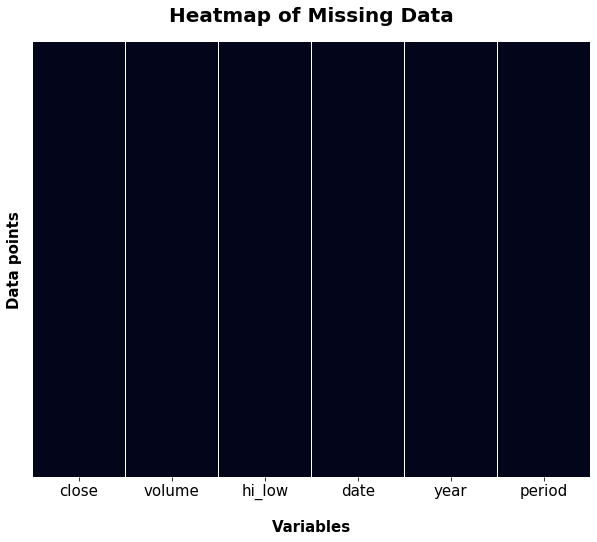

In [79]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(dfp.isna(), cbar=False)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [35]:
# Creating new column with variable describing range between high and low price
dfp['hi_low'] = (dfp['high']-dfp['low'])
dfp = pd.DataFrame(dfp,columns=['close','volume','hi_low', 'date'])
print(dfp.shape)
dfp.head()

(20973889, 4)


,close,volume,hi_low,date
ticker,,,,
AHH,11.58,4633900,0.430000,2013-05-08
AHH,11.55,275800,0.160000,2013-05-09
AHH,11.60,277100,0.100000,2013-05-10
AHH,11.65,147400,0.099999,2013-05-13
AHH,11.53,184100,0.100000,2013-05-14


In [37]:
# Creating new column with variable YEAR
dfp['year'] = pd.DatetimeIndex(dfp['date']).year
dfp.head()

,close,volume,hi_low,date,year
ticker,,,,,
AHH,11.58,4633900,0.430000,2013-05-08,2013
AHH,11.55,275800,0.160000,2013-05-09,2013
AHH,11.60,277100,0.100000,2013-05-10,2013
AHH,11.65,147400,0.099999,2013-05-13,2013
AHH,11.53,184100,0.100000,2013-05-14,2013


In [58]:
# Defining function for assigning period before, during and after the recession
def before(x):
    if x <= '2007-12-01':
        return 'before'
    if x >= '2009-07-01':
        return 'after'
    else:
        return 'recession'

In [61]:
# Applying function to create new column with variable PERIOD
dfp['period'] = dfp['date'].apply(before)
dfp.head()

,close,volume,hi_low,date,year,period
ticker,,,,,,
AHH,11.58,4633900,0.430000,2013-05-08,2013,after
AHH,11.55,275800,0.160000,2013-05-09,2013,after
AHH,11.60,277100,0.100000,2013-05-10,2013,after
AHH,11.65,147400,0.099999,2013-05-13,2013,after
AHH,11.53,184100,0.100000,2013-05-14,2013,after


In [62]:
dfp.loc[dfp['date'] == '2008-10-01']

,close,volume,hi_low,date,year,period
ticker,,,,,,
GHDX,22.34,74300,0.869999,2008-10-01,2008,recession
PEZ,19.08,34000,0.180000,2008-10-01,2008,recession
GTN,1.70,90700,0.110000,2008-10-01,2008,recession
FLWS,6.00,78000,0.090000,2008-10-01,2008,recession
MHD,11.74,25500,0.330000,2008-10-01,2008,recession
...,...,...,...,...,...,...
MNTA,13.18,343200,1.070000,2008-10-01,2008,recession
RMBS,12.92,1630300,0.549999,2008-10-01,2008,recession
AKRX,5.11,172400,0.160000,2008-10-01,2008,recession


In [86]:
# Defining timeframe starting from 1997 to 2018 (ten years before the crisis and ten years after)
dfp_97 = dfp.loc[dfp['year'] >= 1997]

In [114]:
# Creating table of standard deviation grouped by stocks and year
std_by_year = dfp_97.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
std_by_year

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.698,2.456,4.459,1.933,3.191,1.303,2.395,3.598,6.667,3.241
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,6.476,3.821,7.372,1.756,1.446,4.951,5.937,3.437,5.910,4.348
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,1.616,1.205,1.379,1.312,5.717,5.441,5.632,4.396,10.071,3.529
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,1.514,1.805,1.969,2.270,3.341,5.337,4.483,5.046,3.165,6.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.205,4.589,2.276,3.664,5.985,4.864
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.343,3.639,...,2.664,5.114,3.587,6.011,3.162,4.419,8.989,3.236,3.093,2.584
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.462


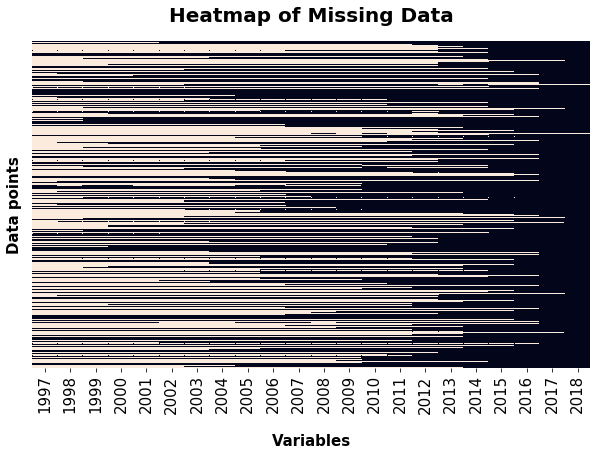

In [268]:
#graphically see the missing data of standard deviation

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(std_by_year.isna(), cbar=False)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

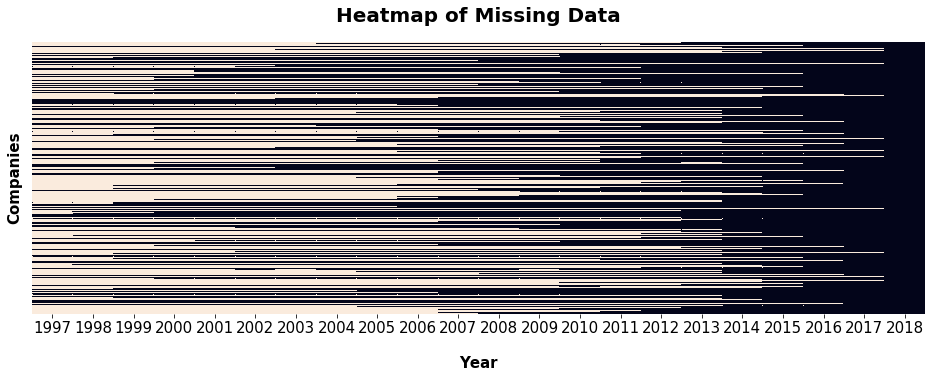

In [269]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(16, 5))
ax = sns.heatmap(by_year.isna(), cbar=False)
plt.xlabel('Year', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Companies',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [180]:
# Creating new Table for NYSE stocks by joining tables
std_table = std_by_year.join(df_nyse, on='ticker')
std_table_nyse

In [182]:
# Creating new Table for NASDAQ stocks by joining tables
std_table = std_table = std_by_year.join(df_nas, on='ticker')
std_table_nas

In [205]:
std_table

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.191,1.303,2.395,3.598,6.667,3.241,NaN,NaN,NaN,NaN
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,1.446,4.951,5.937,3.437,5.910,4.348,NaN,NaN,NaN,NaN
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,5.717,5.441,5.632,4.396,10.071,3.529,NASDAQ,Altaba Inc,Technology,Edp Services
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.215,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,3.341,5.337,4.483,5.046,3.165,6.584,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.205,4.589,2.276,3.664,5.985,4.864,NaN,NaN,NaN,NaN
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.343,3.639,...,3.162,4.419,8.989,3.236,3.093,2.584,NASDAQ,Zumiez Inc,Consumer Services,Clothing Shoe Accessory Stores
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.462,NaN,NaN,NaN,NaN


In [270]:
std_table_nyse.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.191,1.303,2.395,3.598,6.667,3.241,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,1.446,4.951,5.937,3.437,5.910,4.348,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.215,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,0.739,0.142,0.496,0.340,0.317,0.950,1.258,1.937,1.119,1.036,...,0.797,3.253,5.139,2.844,5.446,3.128,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,0.839,1.721,4.707,1.963,5.005,4.565,...,9.807,11.833,14.837,9.589,28.839,14.786,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores


In [133]:
std_table_nas.head()

In [154]:
# Creating new Table of average close price by year and stocks
avgp_by_year = dfp_97.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
avgp_by_year.head()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,34.581,49.877,23.912,16.414,14.479,19.227,19.357,24.178,...,15.644,23.265,29.605,28.595,33.461,40.621,39.602,43.370,59.330,66.917
AA,44.653,42.839,68.950,76.104,88.884,71.484,62.596,79.271,67.260,72.573,...,26.007,30.687,33.523,21.962,20.658,34.726,28.055,23.834,38.302,48.524
AABA,2.087,11.319,45.223,59.967,9.188,7.594,15.331,29.807,35.418,29.954,...,14.870,15.589,15.592,15.997,27.743,39.444,38.972,37.618,56.492,74.460
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.273
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.069,44.322,...,3.830,8.637,7.460,10.496,18.188,38.924,45.122,38.184,47.491,46.213


In [271]:
# Creating new Table of standard deviation in percentage to base price of NYSE stocks by year and companies
std_percent = std_by_year/avgp_by_year*100
std_percent_nyse = std_percent.join(df_nyse, on='ticker')
std_percent_nyse = std_percent_nyse.loc[std_percent_nyse['exchange']=='NYSE']
std_percent_nyse.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,21.393251,34.629188,30.566243,33.587182,24.090061,17.095751,18.406778,8.383655,...,9.536475,3.207700,6.047674,8.296057,11.237148,4.843313,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,8.263722,6.638810,19.424220,12.310785,9.502273,21.386604,18.549109,6.552207,7.809991,6.744933,...,6.999710,14.257329,21.162003,14.420576,15.430004,8.960514,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.827120,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,18.364811,2.786499,10.618711,7.099603,7.024152,14.644674,16.981641,16.144357,8.543289,6.709410,...,2.795510,11.257614,15.925008,11.409773,14.888731,7.115721,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,5.791399,10.182227,22.982276,7.367512,13.147180,12.383691,...,11.509213,9.036894,9.066466,6.167035,23.527636,11.870203,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores


In [265]:
a = pd.DataFrame(comp_std_nyse, columns = ['std'])
a = a.reset_index().set_index('index', drop=False)
a
anova_stock = ols('std~index', data=a).fit()
anova_stock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.334
Date:                Thu, 02 Jan 2020   Prob (F-statistic):              0.262
Time:                        18:27:46   Log-Likelihood:                -58.328
No. Observations:                  22   AIC:                             120.7
Df Residuals:                      20   BIC:                             122.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    292.7864    242.631      1.207      0.242    -213.333     798.906
index         -0.1396      0.121     -1.155      0.262      -0.392       0.112
==============================================================================
Omnibus:                       23.200   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.742
Skew:                           2.058   Prob(JB):                     7.76e-08
Kurtosis:                       7.334   Cond. No.                     6.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
anova_table = sm.stats.anova_lm(anova_stock, type=2)
print(anova_table)

            df      sum_sq    mean_sq         F    PR(>F)
index      1.0   17.261283  17.261283  1.334465  0.261628
Residual  20.0  258.699580  12.934979       NaN       NaN


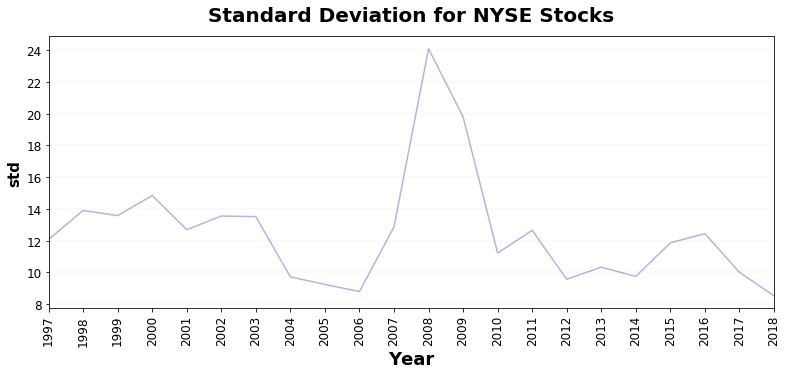

In [495]:
# Creating Chart of standard deviation change for NYSE stocks by year 

fig, ax = plt.subplots(figsize=(10, 5))
ax = comp_std_nyse.plot(color='#0504aa', alpha=0.3, figsize=(13, 5));

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.xticks(ticks = ttt, fontsize=12, rotation='vertical')
plt.ylabel('std', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12);
plt.title('Standard Deviation for NYSE Stocks', fontsize=20, pad = 15, fontweight='bold');
fig.savefig('Std_NYSE.jpg', bbox_inches='tight')

In [546]:
ttt = list(comp_std_nyse.index);

In [215]:
# Creating new Table of standard deviation in percentage to base price of NASDAQ stocks by year and companies
std_percent_nas = std_percent.join(df_nas, on='ticker')
std_percent_nas = std_percent_nas.loc[std_percent_nas['exchange']=='NASDAQ']
std_percent_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,45.280307,62.929587,33.034076,39.450031,36.602090,18.922834,27.460701,17.767638,7.487718,12.819657,...,20.607000,13.794240,14.451401,11.685895,17.827303,4.739457,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.747188,18.559632,...,18.369254,13.711335,9.935287,13.214959,6.664421,14.247073,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,20.422340,7.013723,18.543956,13.647541,16.496599,15.030531,21.707865,4.878869,5.455165,6.560284,...,7.932240,5.003889,10.476428,10.073029,6.265526,12.919463,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.104283,25.530625,22.468999,30.372127,30.649980,18.774508,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,11.944870,12.139423,12.847555,16.362661,18.943534,12.035963,12.709330,10.491441,7.950163,10.535406,...,21.952365,7.606399,6.288892,12.509168,4.575201,8.051075,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.889726,25.825299,7.503828,10.351487,14.862872,7.608696,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.820747,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.139857,49.829838,42.114609,59.520000,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


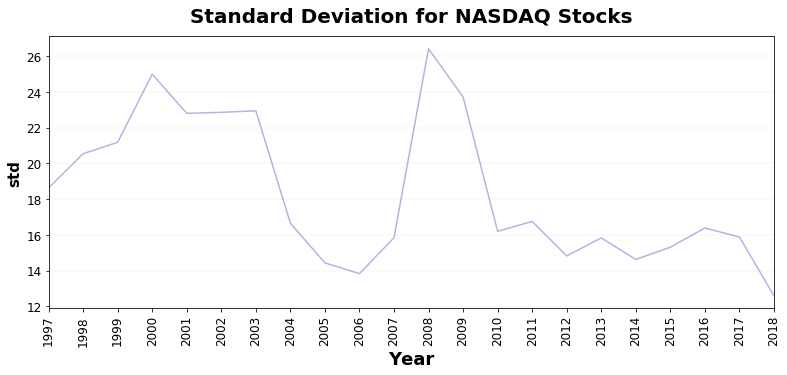

In [498]:
# Creating Chart of standard deviation change for NASDAQ stocks by year 

fig, ax = plt.subplots(figsize=(6, 5))
ax = comp_std_nas.plot(color='#0504aa', alpha=0.3, figsize=(13, 5));

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.xticks(ticks = ttt, fontsize=12, rotation='vertical')
plt.ylabel('std', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12);
plt.title('Standard Deviation for NASDAQ Stocks', fontsize=20, pad = 15, fontweight='bold');


In [190]:
# Calculation and creating table of yearly average return by year 

ret_by_year = avgp_by_year.pct_change(axis='columns').round(3)
ret_by_year.head()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,0.442,-0.521,-0.314,-0.118,0.328,0.007,0.249,...,-0.275,0.487,0.273,-0.034,0.170,0.214,-0.025,0.095,0.368,0.128
AA,NaN,-0.041,0.610,0.104,0.168,-0.196,-0.124,0.266,-0.152,0.079,...,-0.622,0.180,0.092,-0.345,-0.059,0.681,-0.192,-0.150,0.607,0.267
AABA,NaN,4.424,2.995,0.326,-0.847,-0.173,1.019,0.944,0.188,-0.154,...,-0.297,0.048,0.000,0.026,0.734,0.422,-0.012,-0.035,0.502,0.318
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525,...,-0.505,1.255,-0.136,0.407,0.733,1.140,0.159,-0.154,0.244,-0.027


In [531]:
# Creating table of yearly average return by year for NYSE stocks

ret_table_nyse = ret_by_year.join(df_nyse, on='ticker')
ret_table_nyse.mean()

1997          NaN
1998     0.100933
1999     0.052959
2000     0.207861
2001     0.028937
2002     0.042971
2003     0.188706
2004     0.369577
2005     0.145290
2006     0.151281
2007     0.470315
2008    -0.207206
2009    -0.195342
2010    15.993522
2011     0.181511
2012     1.012567
2013     0.252008
2014    14.274619
2015     2.139324
2016     9.177568
2017     0.572261
2018     3.157040
dtype: float64

In [ ]:
ret_by_year.boxplot('ticker', by=columns, figsize=(6, 6))

In [201]:
df = pd.DataFrame(dfp_97.groupby(['ticker', 'year'])['close'].mean().round(3))#.unstack()#.fillna(0)#.fillna('-')
df.head()

close
ticker year        
A      1999  34.581
       2000  49.877
       2001  23.912
       2002  16.414
       2003  14.479

In [221]:
dfp_97

,close,volume,hi_low,date,year,period
ticker,,,,,,
AHH,11.58,4633900,0.430000,2013-05-08,2013,after
AHH,11.55,275800,0.160000,2013-05-09,2013,after
AHH,11.60,277100,0.100000,2013-05-10,2013,after
AHH,11.65,147400,0.099999,2013-05-13,2013,after
AHH,11.53,184100,0.100000,2013-05-14,2013,after
...,...,...,...,...,...,...
NZF,14.59,137500,0.040000,2018-08-20,2018,after
NZF,14.58,151200,0.040000,2018-08-21,2018,after
NZF,14.59,185400,0.060000,2018-08-22,2018,after


In [273]:
# Creating three separate sets of data before, during and after recession
before  = dfp_97.loc[dfp_97['period'] == 'before']
recession  = dfp_97.loc[dfp_97['period'] == 'recession']
after  = dfp_97.loc[dfp_97['period'] == 'after']
print(before.shape)
print(recession.shape)
print(after.shape)

(6268635, 6)
(1249267, 6)
(9752512, 6)


In [540]:
# Creating data set for NYSE 
nyse_97 = dfp_97.join(df_nyse, on='ticker')
nyse_std = nyse_97.groupby('ticker', 'period')['close'].std()
nyse_97

#Running ANOVA test for NYSE

anova_stock_nyse = ols('hi_low~period', data=nyse_97).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_nyse, type=2)
print(anova_table)

                  df        sum_sq       mean_sq           F        PR(>F)
period           2.0  5.062981e+07  2.531491e+07  123.976436  1.439145e-54
Residual  17270411.0  3.526467e+12  2.041913e+05         NaN           NaN


In [544]:
# Creating data set for NASDAQ
nas_97 = dfp_97.join(df_nas, on='ticker')
nyse_std = nyse_97.groupby('ticker', 'period')['close'].std()
nas_97

# Running ANOVA test for NASDAQ

anova_stock_nas_97 = ols('hi_low~period', data=nas_97).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_nas_97, type=2)
print(anova_table)

                  df        sum_sq       mean_sq           F        PR(>F)
period           2.0  5.062981e+07  2.531491e+07  123.976436  1.439145e-54
Residual  17270411.0  3.526467e+12  2.041913e+05         NaN           NaN


In [276]:
# Creating data set before recession for NYSE and NASDAQ 

before_nyse = before.join(df_nyse, on='ticker')
before_nyse = before_nyse.loc[before_nyse['exchange']=='NYSE']
#before_nyse
before_nas = before.join(df_nas, on='ticker')
before_nas = before_nas.loc[before_nas['exchange']=='NASDAQ']
#before_nas

,close,volume,hi_low,date,year,period,exchange,name,sector,industry
ticker,,,,,,,,,,
PEZ,25.420000,10800,0.240000,2006-10-12,2006,before,NASDAQ,Powershares Dwa Consumer Cyclicals Momentum Po...,Missing,Missing
PEZ,25.510000,600,0.039999,2006-10-13,2006,before,NASDAQ,Powershares Dwa Consumer Cyclicals Momentum Po...,Missing,Missing
PEZ,25.590000,1900,0.020000,2006-10-16,2006,before,NASDAQ,Powershares Dwa Consumer Cyclicals Momentum Po...,Missing,Missing
PEZ,25.450001,1300,0.230000,2006-10-17,2006,before,NASDAQ,Powershares Dwa Consumer Cyclicals Momentum Po...,Missing,Missing
PEZ,25.590000,800,0.170000,2006-10-18,2006,before,NASDAQ,Powershares Dwa Consumer Cyclicals Momentum Po...,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...
RMCF,17.299999,14300,0.690001,2007-11-26,2007,before,NASDAQ,Rocky Mountain Chocolate Factory Inc,Consumer Nondurables,Specialty Foods
RMCF,17.010000,6800,0.350000,2007-11-27,2007,before,NASDAQ,Rocky Mountain Chocolate Factory Inc,Consumer Nondurables,Specialty Foods
RMCF,17.590000,10600,0.629999,2007-11-28,2007,before,NASDAQ,Rocky Mountain Chocolate Factory Inc,Consumer Nondurables,Specialty Foods


In [278]:
# Creating data set during recession for NYSE and NASDAQ 
recess_nyse = recession.join(df_nyse, on='ticker')
recess_nyse = recess_nyse.loc[recess_nyse['exchange']=='NYSE']
recess_nas = recession.join(df_nas, on='ticker')
recess_nas = recess_nas.loc[recess_nas['exchange']=='NASDAQ']

In [282]:
# Creating data set after recession for NYSE and NASDAQ 
after_nyse = after.join(df_nyse, on='ticker')
after_nyse = after_nyse.loc[after_nyse['exchange']=='NYSE']
after_nas = after.join(df_nas, on='ticker')
after_nas = after_nas.loc[after_nas['exchange']=='NASDAQ']

In [522]:
#Calculation of average prices for NYSE stocks

avp_rec_nyse = recess_nyse.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
avp_rec_nyse
avp_before_nyse = before_nyse.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_before_nyse
avp_after_nyse = after_nyse.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_after_nyse

In [296]:
#Calculation of average prices for NASDAQ stocks

avp_rec_nas = recess_nas.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_rec_nyse
avp_before_nas = before_nas.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_before_nyse
avp_after_nas = after_nas.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_after_nyse

In [334]:
#Calculation of standart deviation for NYSE stocks

std_rec_nyse = recess_nyse.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
#std_rec_nyse
std_before_nyse = before_nyse.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
#std_before_nyse
std_after_nyse = after_nyse.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
#std_after_nyse

In [298]:
#Calculation of standart deviation for NASDAQ stocks

std_rec_nas = recess_nas.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_rec_nyse
std_before_nas = before_nas.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
std_before_nyse
std_after_nas = after_nas.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
#avp_after_nyse

In [299]:
#Calculation of standart deviation in percent for NYSE stocks

std_percent_nyse_rec = std_rec_nyse/avp_rec_nyse*100
std_percent_nyse_before = std_before_nyse/avp_before_nyse*100
std_percent_nyse_after = std_after_nyse/avp_after_nyse*100

In [300]:
#Calculation of standart deviation in percent for NASDAQ stocks

std_percent_nas_rec = std_rec_nas/avp_rec_nas*100
std_percent_nas_before = std_before_nas/avp_before_nas*100
std_percent_nas_after = std_after_nas/avp_after_nas*100

In [521]:
# Check the data
#print(std_percent_nas_rec.mean())
#std_percent_nas_before.mean().mean()
#std_percent_nas_after.mean().mean()
#std_percent_nas_rec.mean().mean()
#print(std_percent_nas_before.mean())
#print(std_percent_nas_after.mean())

19.432931023175946

In [537]:
# a = before_nyse.groupby('year')['close'].std()
# a
# std_rec_nyse
#before_nyse.boxplot('close', by='year', figsize=(12, 6))
#recess_nyse.boxplot('close', by='year', figsize=(12, 6))
std_percent_nas_rec

year,2007,2008,2009
ticker,,,
AABA,4.677716,29.132593,10.458556
AAL,10.369379,42.611728,47.848665
AAME,11.590470,23.822715,17.090395
AAON,4.728456,9.594497,9.120462
AAPL,3.468675,23.758813,17.652953
...,...,...,...
ZION,6.652823,23.793782,28.245201
ZIOP,11.232503,40.312347,45.115258
ZIXI,7.588464,32.932862,16.601410


In [321]:
# Running ANOVA test for NYSE stocks before recession to check if 
# there is a statistically significant difference in price by years in period before recession
anova_stock_befnyse = ols('close~year', data=before_nyse).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_befnyse, type=2)
print(anova_table)

                 df        sum_sq       mean_sq            F  PR(>F)
year            1.0  5.306136e+08  5.306136e+08  3093.900256     0.0
Residual  3469391.0  5.950115e+11  1.715031e+05          NaN     NaN


In [322]:
# Running ANOVA test for NYSE stocks after recession to check if 
# there is a statistically significant difference in price by years in period after recession
anova_stock_aftnyse = ols('close~year', data=after_nyse).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_aftnyse, type=2)
print(anova_table)

                 df        sum_sq       mean_sq           F        PR(>F)
year            1.0  3.374385e+08  3.374385e+08  137.216529  1.082340e-31
Residual  4859141.0  1.194944e+13  2.459168e+06         NaN           NaN


In [323]:
# Running ANOVA test for NASDAQ stocks before recession to check if 
# there is a statistically significant difference in price by years in period before recession
anova_stock_befnas = ols('close~year', data=before_nas).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_befnas, type=2)
print(anova_table)

                 df        sum_sq       mean_sq           F         PR(>F)
year            1.0  2.314762e+10  2.314762e+10  495.219531  1.065769e-109
Residual  2799240.0  1.308425e+14  4.674215e+07         NaN            NaN


In [324]:
# Running ANOVA test for NASDAQ stocks after recession to check if 
# there is a statistically significant difference in price by years in after before recession
anova_stock_aftnas = ols('close~year', data=after_nas).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_aftnas, type=2)
print(anova_table)

                 df        sum_sq       mean_sq          F        PR(>F)
year            1.0  1.544473e+08  1.544473e+08  37.548676  8.916667e-10
Residual  4893367.0  2.012766e+13  4.113254e+06        NaN           NaN


In [331]:
before_nyse_grtick = before_nyse.groupby('ticker')['close'].std()
before_nyse_grtick

ticker
A      12.766590
AA     16.800246
AAN     4.761051
AAP     9.422135
AAV     2.831547
         ...    
YUM     5.803913
ZBH    19.287207
ZF     11.478053
ZNH     7.080359
ZTR     6.065676
Name: close, Length: 1671, dtype: float64

In [ ]:
std_percent_nas_before

In [413]:
# Creating table for ANOVA
a = before_nyse.groupby(['ticker', 'year'])['close'].mean().round(3)#.unstack()#.fillna(0)#.fillna('-')
b = before_nyse.groupby(['ticker', 'year'])['close'].std().round(3)#.unstack()#.fillna(0)#.fillna('-')
a = a.reset_index().set_index('ticker', drop=True)
b = b.reset_index().set_index('ticker', drop=True)
c = pd.DataFrame(b['close']/a['close']*100)
c = {'year': a['year'], 'std_per': (b['close']/a['close']*100)}
c = pd.DataFrame(data=c)
c = c.reset_index()#.set_index('ticker', drop=True)
c


,ticker,year,std_per
0,A,1999,21.393251
1,A,2000,34.629188
2,A,2001,30.566243
3,A,2002,33.587182
4,A,2003,24.090061
...,...,...,...
14555,ZTR,2003,8.443272
14556,ZTR,2004,2.188194
14557,ZTR,2005,3.557896
14558,ZTR,2006,7.103126


In [416]:
# Running ANOVA test for NYSE stocks before recession to check if 
# there is a statistically significant difference in STD percent by STOCKS in period before recession

anova_stock_benyse = ols('std_per~ticker', data=c).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_benyse, type=2)
print(anova_table)

               df        sum_sq      mean_sq          F  PR(>F)
ticker     1669.0  1.998946e+06  1197.690737  11.633789     0.0
Residual  12878.0  1.325781e+06   102.949327        NaN     NaN


In [415]:
# Running ANOVA test for NYSE stocks after recession to check if 
# there is a statistically significant difference in STD percent by STOCKS in period after recession

anova_stock_a = ols('std_per~year', data=c).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_a, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
year          1.0  2.479543e+04  24795.425483  109.313721  1.705612e-25
Residual  14551.0  3.300576e+06    226.828116         NaN           NaN


In [430]:
# Creating table for ANOVA
aa = after_nyse.groupby(['ticker', 'year'])['close'].mean().round(3)#.unstack()#.fillna(0)#.fillna('-')
bb = after_nyse.groupby(['ticker', 'year'])['close'].std().round(3)#.unstack()#.fillna(0)#.fillna('-')
aa = aa.reset_index().set_index('ticker', drop=True)
bb = bb.reset_index().set_index('ticker', drop=True)
cc = pd.DataFrame(bb['close']/aa['close']*100)
cc = {'year': aa['year'], 'std_per': (bb['close']/aa['close']*100)}
cc = pd.DataFrame(data=cc)
cc = cc.reset_index()#.set_index('ticker', drop=True)
cc

,ticker,year,std_per
0,A,2009,11.834887
1,A,2010,10.556630
2,A,2011,15.061645
3,A,2012,6.759923
4,A,2013,9.536475
...,...,...,...
21772,ZTS,2017,9.790610
21773,ZTS,2018,5.845732
21774,ZUO,2018,17.803136
21775,ZYME,2017,20.262622


In [431]:
# Running ANOVA test for NYSE stocks before recession to check if 
# there is a statistically significant difference in STD percent by STOCKS in period before recession


anova_stock_afnyse = ols('std_per~ticker', data=cc).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_afnyse, type=2)
print(anova_table)

               df        sum_sq     mean_sq         F  PR(>F)
ticker     2585.0  1.752745e+06  678.044512  4.991972     0.0
Residual  19162.0  2.602717e+06  135.826993       NaN     NaN


In [504]:
# Running ANOVA test for NYSE stocks after recession to check if 
# there is a statistically significant difference in STD percent by YEAR in period after recession

anova_stock_afnyse = ols('std_per~year', data=cc).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_afnyse, type=2)
print(anova_table)

               df        sum_sq      mean_sq          F    PR(>F)
year          1.0  3.109379e+03  3109.378632  15.540819  0.000081
Residual  21756.0  4.352901e+06   200.078172        NaN       NaN


In [433]:
# Creating table for ANOVA

a1 = before_nas.groupby(['ticker', 'year'])['close'].mean().round(3)#.unstack()#.fillna(0)#.fillna('-')
b1 = before_nas.groupby(['ticker', 'year'])['close'].std().round(3)#.unstack()#.fillna(0)#.fillna('-')
a1 = a1.reset_index().set_index('ticker', drop=True)
b1 = b1.reset_index().set_index('ticker', drop=True)
c1 = pd.DataFrame(b1['close']/a1['close']*100)
c1 = {'year': a1['year'], 'std_per': (b1['close']/a1['close']*100)}
c1 = pd.DataFrame(data=c1)
c1 = c1.reset_index()#.set_index('ticker', drop=True)
c1


,ticker,year,std_per
0,AABA,1997,45.280307
1,AABA,1998,62.929587
2,AABA,1999,33.034076
3,AABA,2000,39.450031
4,AABA,2001,36.602090
...,...,...,...
12708,ZIXI,2007,30.286825
12709,ZN,2007,19.550299
12710,ZUMZ,2005,14.288328
12711,ZUMZ,2006,12.572988


In [434]:
# Running ANOVA test for NASDAQ stocks before recession to check if 
# there is a statistically significant difference in STD percent by STOCKS in period before recession

anova_stock_benas = ols('std_per~ticker', data=c1).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_benas, type=2)
print(anova_table)

               df        sum_sq      mean_sq         F  PR(>F)
ticker     1551.0  2.281891e+06  1471.238326  7.214873     0.0
Residual  11139.0  2.271436e+06   203.917435       NaN     NaN


In [435]:
# Running ANOVA test for NASDAQ stocks before recession to check if 
# there is a statistically significant difference in STD percent by YEAR in period before recession


anova_stock_benas = ols('std_per~year', data=c1).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_benas, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
year          1.0  9.437597e+04  94375.967853  268.501267  9.876027e-60
Residual  12685.0  4.458672e+06    351.491705         NaN           NaN


In [436]:
# Creating table for ANOVA
aa1 = after_nas.groupby(['ticker', 'year'])['close'].mean().round(3)#.unstack()#.fillna(0)#.fillna('-')
bb1 = after_nas.groupby(['ticker', 'year'])['close'].std().round(3)#.unstack()#.fillna(0)#.fillna('-')
aa1 = aa1.reset_index().set_index('ticker', drop=True)
bb1 = bb1.reset_index().set_index('ticker', drop=True)
cc1 = pd.DataFrame(bb1['close']/aa1['close']*100)
cc1 = {'year': aa1['year'], 'std_per': (bb1['close']/aa1['close']*100)}
cc1 = pd.DataFrame(data=cc1)
cc1 = cc1.reset_index()#.set_index('ticker', drop=True)
cc1

,ticker,year,std_per
0,AABA,2009,6.428661
1,AABA,2010,7.729809
2,AABA,2011,8.844279
3,AABA,2012,8.201538
4,AABA,2013,20.607000
...,...,...,...
23080,ZUMZ,2018,10.977993
23081,ZYNE,2015,38.999147
23082,ZYNE,2016,28.751141
23083,ZYNE,2017,35.320804


In [437]:
#ANOVA NASDAQ after RECESSION

anova_stock_afnas = ols('std_per~ticker', data=cc1).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_afnas, type=2)
print(anova_table)

               df        sum_sq     mean_sq         F  PR(>F)
ticker     3097.0  2.982203e+06  962.932838  5.371705     0.0
Residual  19961.0  3.578212e+06  179.260173       NaN     NaN


In [438]:
# Running ANOVA test for NASDAQ stocks after recession to check if 
# there is a statistically significant difference in STD percent by YEAR in period after recession

anova_stock_afnas = ols('std_per~year', data=cc1).fit()
#anova_stock.summary()
anova_table = sm.stats.anova_lm(anova_stock_afnas, type=2)
print(anova_table)

               df        sum_sq      mean_sq         F    PR(>F)
year          1.0  2.711834e+03  2711.833857  9.534442  0.002019
Residual  23056.0  6.557703e+06   284.425012       NaN       NaN


In [450]:
v = np.array(list(c['std_per']))
vv = np.array(list(cc['std_per']))

In [460]:
def welch_t(c, cc):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = c.mean() - cc.mean()
    print(numerator)
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(c.var(ddof=1)/c.size + cc.var(ddof=1)/c.size)
    
    return np.abs(numerator/denominator)

welch_t(v, vv)
# 2.0997990691576858

0    1.341468
dtype: float64


0    7.817534
dtype: float64

In [458]:
v = pd.DataFrame(v)
vv = pd.DataFrame(vv)

In [459]:
vv

,0
0,11.834887
1,10.556630
2,15.061645
3,6.759923
4,9.536475
...,...
21772,9.790610
21773,5.845732
21774,17.803136
21775,20.262622
